K - Means 

In [8]:
import pandas as pd

In [9]:
data={
    'id': [1, 2, 3, 4, 5],
    'age': [24, 27, 22, 32, 29],
    'salary': [45000, 54000, 35000, 62000, 58000],
    'city': ['Mumbai', 'Delhi', 'Pune', 'Mumbai', 'Delhi']
}
df=pd.DataFrame(data)
df

,id,age,salary,city
0,1,24,45000,Mumbai
1,2,27,54000,Delhi
2,3,22,35000,Pune
3,4,32,62000,Mumbai
4,5,29,58000,Delhi


In [10]:
from sklearn.preprocessing import OrdinalEncoder 
encoder=OrdinalEncoder()
cat_cols=['city']

df[cat_cols] = encoder.fit_transform(df[cat_cols])
df

,id,age,salary,city
0,1,24,45000,1.0
1,2,27,54000,0.0
2,3,22,35000,2.0
3,4,32,62000,1.0
4,5,29,58000,0.0


In [4]:
x=df[['age','salary','city']]
x

,age,salary,city
0,24,45000,1.0
1,27,54000,0.0
2,22,35000,2.0
3,32,62000,1.0
4,29,58000,0.0


In [19]:
from sklearn.cluster import KMeans
inertial_list=[]

In [20]:
for k in range(1, len(x) + 1):  
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(x)
    inertial_list.append(model.inertia_)


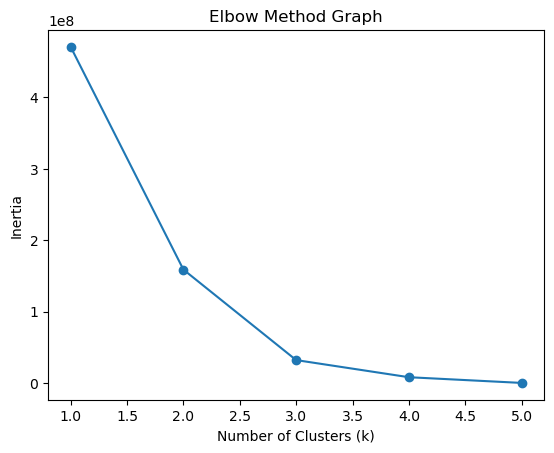

In [22]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(inertial_list) + 1), inertial_list, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method Graph")
plt.show()


In [29]:

kmean = KMeans(n_clusters=4)

kmean.fit(x)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [30]:
print(kmean.labels_)

[2 3 1 0 3]


In [31]:
df['Cluster'] = kmean.labels_
df


,id,age,salary,city,Cluster
0,1,24,45000,1.0,2
1,2,27,54000,0.0,3
2,3,22,35000,2.0,1
3,4,32,62000,1.0,0
4,5,29,58000,0.0,3


In [32]:
from sklearn.metrics import silhouette_score

print("Inertia:", kmean.inertia_)

sil_score = silhouette_score(x, kmean.labels_)
print("Silhouette Score:", sil_score)



Inertia: 8000002.0
Silhouette Score: 0.10000004531247722


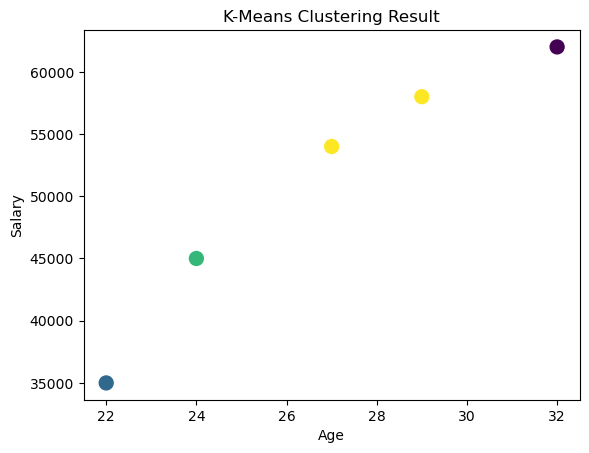

In [33]:
import matplotlib.pyplot as plt

plt.scatter(x['age'], x['salary'], c=kmean.labels_, s=100)
plt.xlabel("Age")
plt.ylabel("Salary")
plt.title("K-Means Clustering Result")
plt.show()
